In [73]:
import numpy as np
import matplotlib.pyplot as plt
import functions_linear_models as flm
import importlib

In [76]:
importlib.reload(flm)

<module 'functions_linear_models' from 'C:\\Users\\Rafael\\Documents\\Downloads\\functions_linear_models.py'>

In [18]:
curve1 = np.load('parametriccurve.npy')

In [19]:
curve2 = (curve1/np.max(curve1,0)-0.5)
curve0 = curve2 - np.mean(curve2,0)

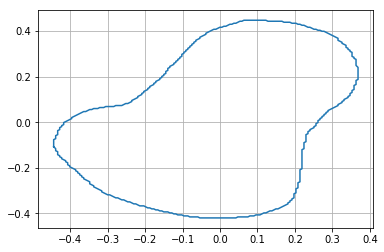

In [20]:
plt.plot(curve0[:,0],curve0[:,1])
plt.grid()

In [66]:
curve = np.zeros(curve0.shape)
for i in range(2):
    sigma = 4 
    curve[sigma*3:-3*sigma+1,i] = np.convolve(curve0[:,i],flm.gauss_kernel95(sigma),'valid')
    int_s = len(curve)//2-(sigma*3)//2
    int_e = len(curve)//2+(sigma*3)//2
    curve[:sigma*3+1,i] = np.fft.ifftshift(np.convolve(np.fft.fftshift(curve0[:,i]),flm.gauss_kernel95(sigma),'valid'))[:sigma*3+1]
    curve[-sigma*3:,i] = np.fft.ifftshift(np.convolve(np.fft.fftshift(curve0[:,i]),flm.gauss_kernel95(sigma),'valid'))[-sigma*3:]
    

In [67]:
len(curve)//2+(sigma*3)//2

253

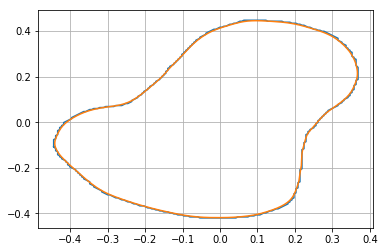

In [68]:
plt.plot(curve0[:,0],curve0[:,1])
plt.plot(curve[:,0],curve[:,1])
plt.grid()

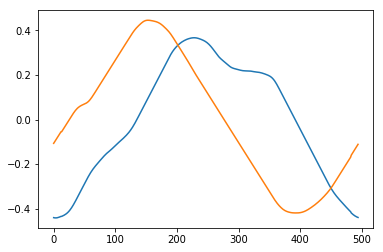

In [69]:
plt.plot(curve)

In [103]:
Coeff, corr, Corr_vec, Corr_est = flm.LinModv1(curve[:-1],curve[1:],50)

Number of invalid windows:  0


In [104]:
a = Coeff[:,1:,0]
b = Coeff[:,1:,1:]

In [117]:
eig = np.linalg.eig(1-b*100) 

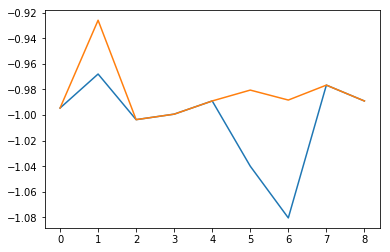

In [122]:
plt.plot(np.real(eig[0])*0.01)

In [113]:
b[0]

array([[ 0.99499738,  0.04010985],
       [-0.03722691,  1.01413916]])